---
# Imports

In [1]:
import os, sys
import pandas as pd
import numpy as np

from tqdm import tqdm

import easyocr

import matplotlib.pyplot as plt

---
# Setup

In [2]:
DATA_PATH = os.path.join('..', 'data')
IMAGES_PATH = os.path.join(DATA_PATH, 'train_val_images', 'train_images')

assert os.path.exists(DATA_PATH), f"Data path {DATA_PATH} does not exist. Please create it and add the data files."
assert os.path.exists(IMAGES_PATH), f"Images path {IMAGES_PATH} does not exist. Please create it and add the image files."

---
# Data Import

In [3]:
img_info_df = pd.read_csv(os.path.join(DATA_PATH, 'img.csv'))
annotations_df = pd.read_csv(os.path.join(DATA_PATH, 'annot.csv'))

images = os.listdir(IMAGES_PATH)

In [4]:
img_info_df.drop(columns=['Unnamed: 0'], inplace=True)
annotations_df.drop(columns=['Unnamed: 0'], inplace=True)

## Check dfs

In [5]:
img_info_df.head(5)

,id,width,height,set,file_name
0,a4ea732cd3d5948a,840,1024,train,train/a4ea732cd3d5948a.jpg
1,4bf43a7b2a898044,1024,683,train,train/4bf43a7b2a898044.jpg
2,1b55b309b0f50d02,1024,683,train,train/1b55b309b0f50d02.jpg
3,00c359f294f7dcd9,1024,680,train,train/00c359f294f7dcd9.jpg
4,04b5a37f762b0f51,768,1024,train,train/04b5a37f762b0f51.jpg


In [6]:
annotations_df.head(5)

,id,image_id,bbox,utf8_string,points,area
0,a4ea732cd3d5948a_1,a4ea732cd3d5948a,"[525.83, 3.4, 197.64, 33.94]",Performance,"[525.83, 3.4, 723.47, 7.29, 722.76, 36.99, 525...",6707.90
1,a4ea732cd3d5948a_2,a4ea732cd3d5948a,"[534.67, 64.68, 91.22, 38.19]",Sport,"[535.73, 64.68, 623.41, 67.51, 625.89, 102.87,...",3483.69
2,a4ea732cd3d5948a_3,a4ea732cd3d5948a,"[626.95, 63.62, 96.52, 31.82]",Watch,"[626.95, 63.62, 721.7, 63.62, 723.47, 95.44, 6...",3071.27
3,a4ea732cd3d5948a_4,a4ea732cd3d5948a,"[577.4, 141.87, 147.13, 43.1]",...period.,"[580.02, 143.61, 724.53, 141.87, 723.66, 184.9...",6341.30
4,a4ea732cd3d5948a_5,a4ea732cd3d5948a,"[391.03, 163.9, 60.82, 38.65]",.,"[395.2, 163.9, 451.85, 191.94, 445.59, 202.55,...",2350.69


---
# EasyOCR Testing

In [7]:
test_image_id = img_info_df['id'].head(1).values[0]
print(f"Test image id: {test_image_id}")

Test image id: a4ea732cd3d5948a


In [8]:
reader = easyocr.Reader(['en'], gpu=False)

Using CPU. Note: This module is much faster with a GPU.


In [44]:
test_image_file = test_image_id + '.jpg'
results = reader.readtext(os.path.join(IMAGES_PATH, test_image_file), paragraph=False, width_ths=0)

d:\Documents\Obrazovanie\Fakultet\Semestar 8\DPNS\Project\.venv\lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


In [45]:
for (bbox, text, prob) in results:
    print(f"Detected text: {text}")

Detected text: Performance
Detected text: Sport
Detected text: Watch
Detected text: period:
Detected text: @TOR


In [46]:
annotations_df[annotations_df['image_id'] == test_image_id]

,id,image_id,bbox,utf8_string,points,area
0,a4ea732cd3d5948a_1,a4ea732cd3d5948a,"[525.83, 3.4, 197.64, 33.94]",Performance,"[525.83, 3.4, 723.47, 7.29, 722.76, 36.99, 525...",6707.90
1,a4ea732cd3d5948a_2,a4ea732cd3d5948a,"[534.67, 64.68, 91.22, 38.19]",Sport,"[535.73, 64.68, 623.41, 67.51, 625.89, 102.87,...",3483.69
2,a4ea732cd3d5948a_3,a4ea732cd3d5948a,"[626.95, 63.62, 96.52, 31.82]",Watch,"[626.95, 63.62, 721.7, 63.62, 723.47, 95.44, 6...",3071.27
3,a4ea732cd3d5948a_4,a4ea732cd3d5948a,"[577.4, 141.87, 147.13, 43.1]",...period.,"[580.02, 143.61, 724.53, 141.87, 723.66, 184.9...",6341.30
4,a4ea732cd3d5948a_5,a4ea732cd3d5948a,"[391.03, 163.9, 60.82, 38.65]",.,"[395.2, 163.9, 451.85, 191.94, 445.59, 202.55,...",2350.69
5,a4ea732cd3d5948a_6,a4ea732cd3d5948a,"[455.64, 204.45, 21.97, 24.82]",400,"[464.54, 204.45, 477.61, 221.88, 469.85, 229.2...",545.30
6,a4ea732cd3d5948a_7,a4ea732cd3d5948a,"[474.58, 234.95, 17.24, 24.25]",300,"[484.43, 234.95, 491.82, 253.9, 482.35, 259.2,...",418.07
7,a4ea732cd3d5948a_8,a4ea732cd3d5948a,"[506.48, 263.69, 25.42, 41.99]",15,"[531.9, 263.69, 531.43, 304.04, 507.18, 305.68...",1067.39
8,a4ea732cd3d5948a_9,a4ea732cd3d5948a,"[346.4, 177.05, 54.56, 38.48]",12,"[346.4, 180.79, 397.52, 177.05, 400.96, 215.53...",2099.47
9,a4ea732cd3d5948a_10,a4ea732cd3d5948a,"[364.49, 163.27, 19.82, 16.08]",60,"[364.49, 163.27, 383.73, 163.27, 384.31, 178.7...",318.71


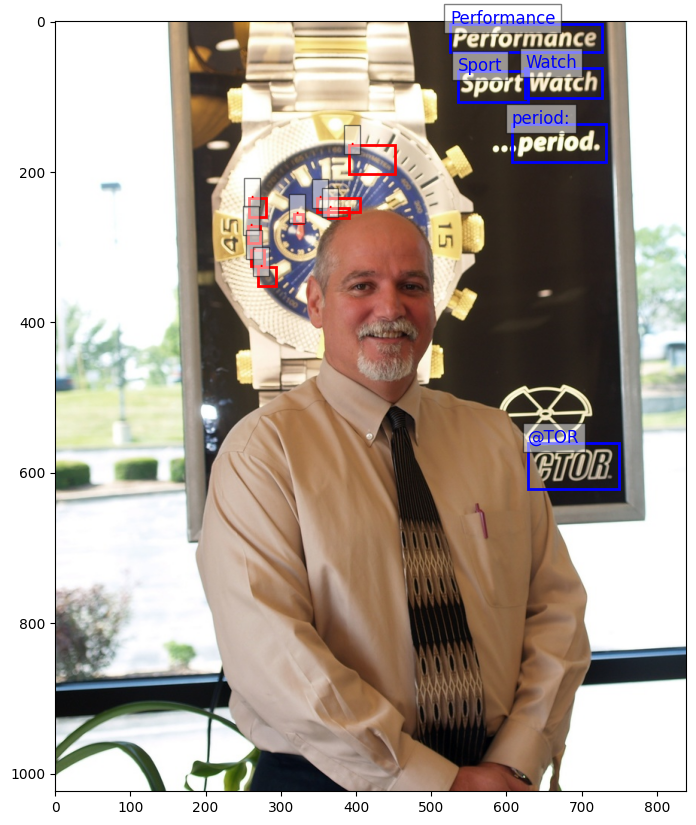

In [48]:
plt.figure(figsize=(10, 10))

img = plt.imread(os.path.join(IMAGES_PATH, test_image_file))
plt.imshow(img)

for row in annotations_df[annotations_df['image_id'] == test_image_id].itertuples():
    bbox = row.bbox.split(',')
    bbox = [float(b.replace('[', '').replace(']', '').strip()) for b in bbox]
    x1, y1, x2, y2 = bbox[0], bbox[1], bbox[2], bbox[3]
    text = row.utf8_string
    
    if text != '.':
        continue
    
    
    plt.gca().add_patch(plt.Rectangle((x1, y1), x2, y2, fill=False, edgecolor='red', linewidth=2))
    plt.text(x1, y1, text, fontsize=12, color='red', bbox=dict(facecolor='white', alpha=0.5))
    
for (bbox, text, prob) in results:
    x1, y1, x2, y2 = bbox[0][0], bbox[0][1], bbox[2][0], bbox[2][1]
    
    plt.gca().add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, edgecolor='blue', linewidth=2))
    plt.text(x1, y1, text, fontsize=12, color='blue', bbox=dict(facecolor='white', alpha=0.5))